In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy.stats import sem, t

from PIL import Image

In [39]:
df = pd.read_excel('wines_condescrvar.xls')
df

,Category,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
0,OLO,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,OLO,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,OLO,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,OLO,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,OLO,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,ERA,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,ERA,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,ERA,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,ERA,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


The dataset contains **178 samples** and **14 variables**, with three wine categories: OLO (Barolo), GR (Grignolino), and ERA (Barbera).  
Variables describe alcohol content, organic acids (e.g., malic acid), minerals (e.g., magnesium), phenolic compounds (phenols, flavonoids, proanthocyanins), and color properties (intensity, hue, OD ratios). Proline, an amino acid, is also included.  

**Note:** Since units of measurement differ (%, g/L, mg/L), variables lie on different scales, then normalization is recommended before multivariate analysis.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           178 non-null    object 
 1   Alcohol            178 non-null    float64
 2   Malic ac           178 non-null    float64
 3   Ash                178 non-null    float64
 4   Alcalinity of ash  178 non-null    float64
 5   Mg                 178 non-null    int64  
 6   Phenols            178 non-null    float64
 7   Flavanoids         178 non-null    float64
 8   Nonflav phen       178 non-null    float64
 9   Proanthoc          178 non-null    float64
 10  Color intensity    178 non-null    float64
 11  Hue                178 non-null    float64
 12  OD280/OD315        178 non-null    float64
 13  Proline            178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


- **Rows / Columns:** 178 / 14
- **Types:** "Category" → string | "Mg" – "Proline" → integers | the other are float
- **Missing values:** None  

**Note:** Data types are consistent and no missing values detected

In [41]:
df.describe()

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Using df.describe(), I get a quick statistical overview of the numerical columns, including count, mean, standard deviation, min, max and quartiles.  

Relevant informations from the summary:  
- **Proline** shows the highest mean and variability, suggesting it plays a key role in differentiating samples.  
- **Nonflav phen** recorded the lowest absolute value.  
- **Proline** also reached the highest absolute value among all fatty acids.  

**Key Insight:** Proline stands out as a particularly influential variable. Without proper standardization, its scale may dominate the feature space, overshadowing the contribution of other variables. Standardizing the data ensures that all features contribute comparably to the analysis, preventing biased interpretations driven mainly by proline.

In [42]:
df.groupby('Category').count()

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
Category,,,,,,,,,,,,,
ERA,48,48,48,48,48,48,48,48,48,48,48,48,48
GR,71,71,71,71,71,71,71,71,71,71,71,71,71
OLO,59,59,59,59,59,59,59,59,59,59,59,59,59


This dataset includes three categories of red wine: **Barolo (OLO), Barbera (ERA), and Grignolino (GR)**, described by **14 variables**. The classes are fairly balanced, since the number of samples per category does not differ dramatically.  

The variables are measured on different scales and units (e.g., magnesium in g/kg, phenolic compounds in mg/L). Because **PCA is sensitive to scale differences**, giving more weight to variables with larger values, it is necessary to **standardize the data** so that each variable contributes equally. Standardization transforms every variable into a distribution with mean 0 and standard deviation 1.  

If some variables display **high skewness** or long tails (due to extreme values), additional transformations such as logarithmic or square-root scaling may be useful. However, when such distortions are absent, standardization is typically sufficient.  

A good **preliminary step** is to visualize the variable distributions (e.g., with boxplots) to check for skewness or outliers that might justify further transformations.

In [43]:
dfNum = df.drop(columns='Category')

# Figure creation
fig = go.Figure()

colNum = dfNum.columns

# Adding box plots for each numerical variable
for var in colNum:
    fig.add_trace(go.Box(y=dfNum[var], name=var))

# Updating layout for better visualization
fig.update_layout(title="DISTRIBUTION OF VARIABLES: BEFORE SCALING", yaxis_title="Values", template='presentation', showlegend=False)

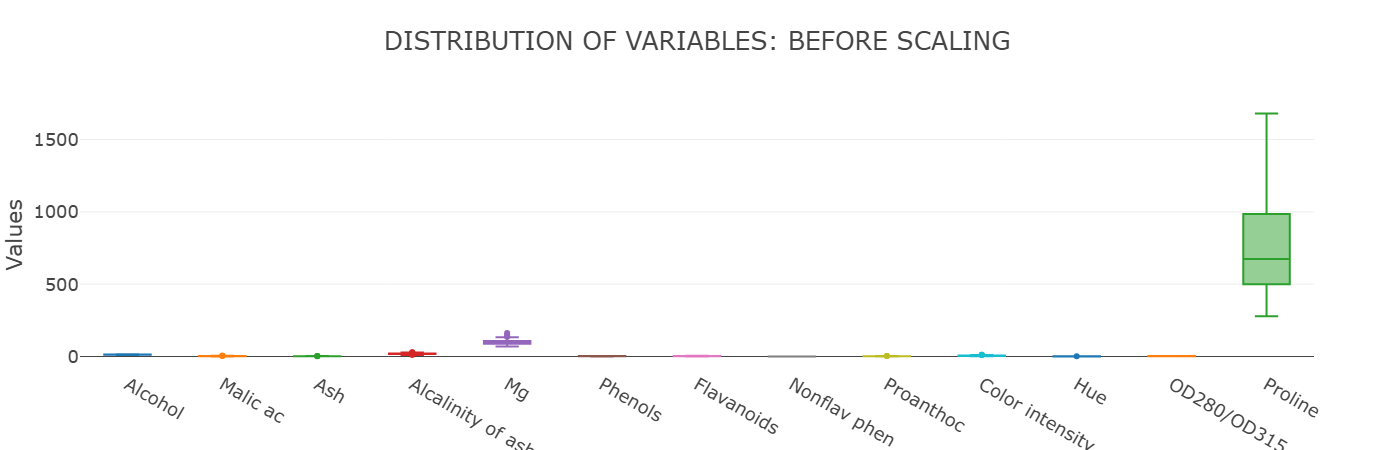

In [68]:
Image.open("distribution of variables before scaling.png")

The distribution of all variables highlights a **scale variability issue** that could bias PCA, which tends to favor variables with larger absolute values (such as **proline**). Proline’s distribution is particularly wide and reaches such high values that the other boxplots appear almost "collapsed" in comparison.  

When looking at each boxplot individually (by zooming in on thme one by one), however, the underlying shapes become clearer. Strong asymmetries are especially evident in **malic acid, magnesium, non-flavonoid phenols, proanthocyanins, color intensity and proline**. Other variables show milder skewness.  

For this reason, **standardization** is a sensible first step to ensure fair weighting in PCA. Even in the presence of moderate skewness, standardization usually works well, preserving information without requiring further transformations.  

If asymmetric variables remain disproportionately impactful in PCA, additional normalization (e.g., logarithmic or square-root transformation) can be applied. This **iterative and adaptive approach** keeps the workflow flexible without introducing unnecessary complexity from the start.

**STANDARDIZATION**

Standardization is the process of making data uniform and comparable by applying common rules. Essentially, it transforms each value so that the variable has a **mean of 0** and a **standard deviation of 1**.  

The typical formula is:  
$$
z = \frac{x - \mu}{\sigma}
$$
where:  
- $x$ is the original value  
- $\mu$ is the mean of the variable  
- $\sigma$ is the standard deviation  

This transformation ensures that variables with different scales can be analyzed together and compared meaningfully.

In [44]:
scaler = StandardScaler()
dfNumScal = scaler.fit_transform(dfNum)
dfNumScal = pd.DataFrame(dfNumScal, columns=dfNum.columns)
dfNumScal

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [45]:
# Figure creation
fig = go.Figure()

colNum = dfNumScal.columns

# Adding box plots for each numerical variable
for var in colNum:
    fig.add_trace(go.Box(y=dfNumScal[var], name=var))

# Updating layout for better visualization
fig.update_layout(title="DISTRIBUTION OF VARIABLES: AFTER SCALING", yaxis_title="Values", template='presentation', showlegend=False)

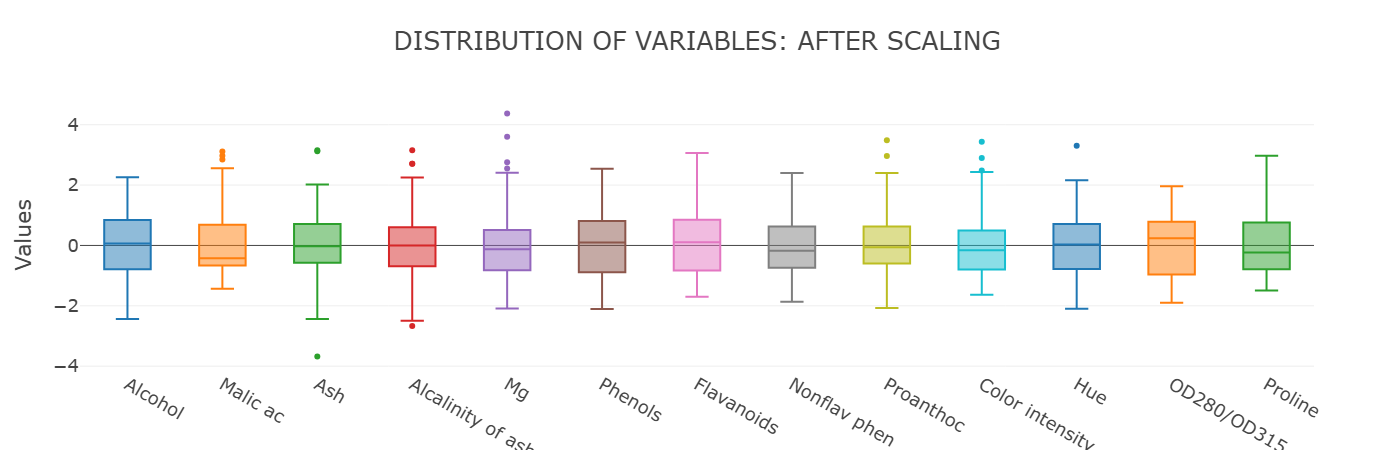

In [72]:
Image.open("distribution of variables after scaling.png")

All variables have now been rescaled to a common scale, with a mean of 0 and a standard deviation of 1. This ensures that each variable contributes equally to analyses and visualizations, preventing differences in units or ranges from dominating the results.

In [46]:
pd.DataFrame({
    'Media': np.abs(round(dfNumScal.mean(), 3)),
    'Standard Deviation': round(dfNumScal.std(), 2)
}).T

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
Media,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Standard Deviation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Analytically, the data confirms a **mean of 0** and a **variance of 1**, exactly as intended. This verifies that the standardization process was successful and the dataset is properly scaled for subsequent analyses.

**PRINCIPAL COMPONENT ANALYSIS (PCA)**

Let consider a dataset with $n$ observations and $m$ variables:

$$
X \in \mathbb{R}^{n \times m}
$$

where each row is an observation and each column is a variable.

---

## 2. Data centering

We subtract the mean from each variable:

$$
\tilde{X} = X - \mathbf{1}\mu^T
$$

where the **outer** product $\mathbf{1}\mu^T$ includes:

* $\mu = \frac{1}{n} \sum_{i=1}^n X_{i}$, the mean vector ($m \times 1$);
* $\mathbf{1}$, an $n \times 1$ column vector of ones.


Standardisation already includes centralisation, so there is no need to centralise data again!

---

## 3. Covariance matrix

The covariance matrix of the centered data is:

$$
S = \frac{1}{n-1} \tilde{X}^T \tilde{X}, \quad S \in \mathbb{R}^{m \times m}
$$

---

## 4. Eigenvalues and eigenvectors

We solve the so-called eigenvalue problem:

$$
S v_i = \lambda_i v_i
$$

where:

* $\lambda_i$ is the eigenvalue (variance explained by the $i$-th component),
* $v_i$ is the unit eigenvector (direction of the $i$-th principal component).

The eigenvalues are ordered in decreasing order:

$$
\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_m
$$

---

## 5. Principal components

The principal components are given by:

$$
Z = \tilde{X} V
$$

where:

* $V = [v_1, v_2, \dots, v_m]$, also called **loadings** matrix, is the matrix of eigenvectors (orthogonal, thus $V^T V = I$),
* $Z \in \mathbb{R}^{n \times m}$, also called **scores** matrix, contains the projected data.

The $k$-th principal component for observation $i$ is:

$$
z_{ik} = \tilde{x}_i^T v_k
$$

---

## 6. Explained variance

The variance explained by the $k$-th component is:

$$
Var(z_k) = \lambda_k
$$

The proportion of variance explained (PVE) is:

$$
\text{PVE}_k = \frac{\lambda_k}{\sum_{j=1}^m \lambda_j}
$$

---

## 7. Dimensionality reduction

If we want to reduce to $K$ principal components ($K < p$), we just consider
$$
V_K = [v_1, v_2, \dots, v_K]
$$

In [47]:
# PCA with all components
pca = PCA()
scores = pca.fit_transform(dfNumScal)
dfScore = pd.DataFrame(scores, columns=dfNum.columns)
dfScore

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


Selecting the right number of principal components is critical when performing PCA. The goal is to reduce dimensionality while retaining as much information as possible. However, the choice is not trivial:  

- **Too few components:** Retaining too few components risks losing important information. The total explained variance will be low, which can degrade machine learning performance or hide significant patterns.  
- **Too many components:** Keeping too many components reduces the effectiveness of dimensionality reduction, as most original variables are still retained. Benefits in computation, storage or visualization are minimized.  

**Common strategies for selecting components:**  
1. **Scree plot:** Plot the eigenvalues and look for the "elbow," the point where the decrease slows down. Components before the elbow are typically kept.  
2. **Cumulative explained variance:** Choose enough components to explain a desired percentage of total variance (commonly 90–95%).

This approach ensures a balance between reducing dimensionality and preserving meaningful information for analysis or modeling.

In [48]:
# Cumulative explained variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Figure creation
fig = go.Figure()

# Trace addition
fig.add_trace(go.Scatter(x=np.arange(1, len(explained_variance_ratio_cumsum) + 1), y=explained_variance_ratio_cumsum*100, mode='lines', name='Cumulative Explained Variance'))

# Highlighting the optimal point where the components explain most of the variance
fig.add_annotation(x=5, y=explained_variance_ratio_cumsum[4] * 100, showarrow=True, arrowhead=2, arrowcolor="red", arrowsize=1.5)

# Layout update
fig.update_layout(title="SCREE PLOT: CUMULATIVE VARIANCE EXPLAINED", xaxis_title="PCs numbers", yaxis_title="Explained variance (%)", template='presentation')

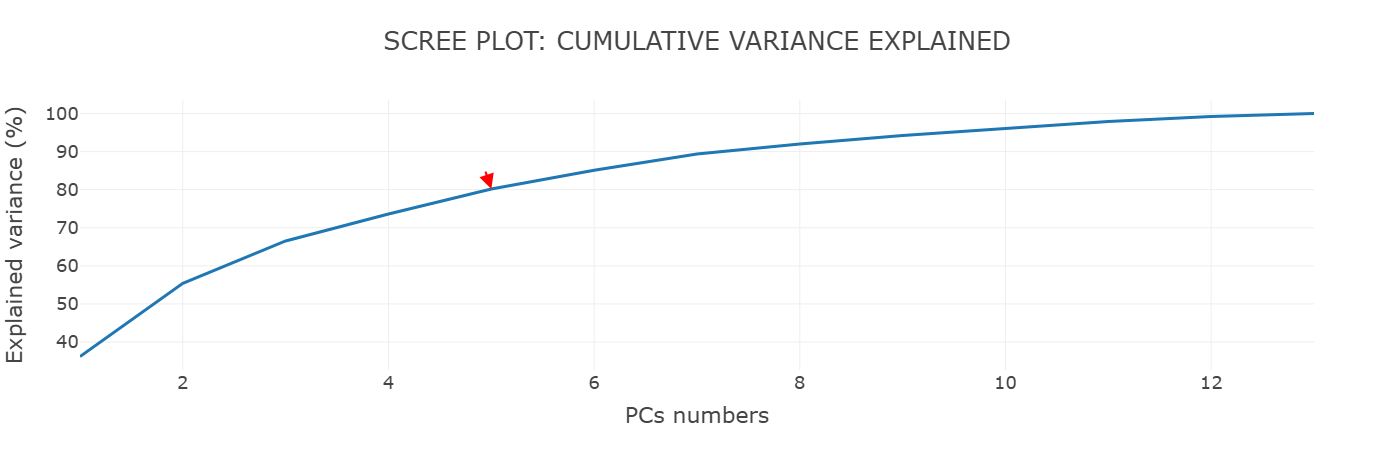

In [73]:
Image.open("scree plot cumulative variance explained.png")

I selected the first five principal components, which together explain **80% of the total variance**. Observing the explained variance curve, we see a steep increase in the initial components, with a rapid gain up to the fifth component. From the sixth component, the curve flattens and additional components contribute only marginally to the total variance.  

This indicates that the first five components capture most of the important information in the dataset, making them sufficient for dimensionality reduction and further analysis.

In [49]:
pca = PCA(n_components=5)

# Scores
scores = pca.fit_transform(dfNumScal)
dfScore = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
dfScore

,PC1,PC2,PC3,PC4,PC5
0,3.316751,1.443463,-0.165739,-0.215631,0.693043
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,1.031151,0.982819,0.724902,-0.251033
3,3.757066,2.756372,-0.176192,0.567983,-0.311842
4,1.008908,0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,1.757229,0.207581,0.349496,0.255063
175,-2.677839,2.760899,-0.940942,0.312035,1.271355
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955


In [50]:
# Loadings
loadings = pca.components_.T
dfLoadings = pd.DataFrame(loadings, index=dfNum.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

dfLoadings

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664
Malic ac,-0.245188,0.224931,0.089013,0.536890,0.035214
Ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025
Alcalinity of ash,-0.239320,-0.010591,0.612080,0.060859,0.066103
Mg,0.141992,0.299634,0.130757,-0.351797,0.727049
Phenols,0.394661,0.065040,0.146179,0.198068,-0.149318
Flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026
Nonflav phen,-0.298533,0.028779,0.170368,-0.203301,-0.500703
Proanthoc,0.313429,0.039302,0.149454,0.399057,0.136860
Color intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437


In [51]:
dfEV = pd.DataFrame(pca.explained_variance_).T
dfEV.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
dfEV.index = ['Varianza']
dfEV

,PC1,PC2,PC3,PC4,PC5
Varianza,4.732437,2.511081,1.454242,0.924166,0.858049


In [52]:
pcaInverseTransformation = scores @ loadings.T  # Reconstruction of the original data using only the selected principal components. @= matrix product

# Residuals matrix
matriceResidui = dfNumScal - pcaInverseTransformation
matriceResidui

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
0,0.487669,0.032416,-0.060649,-0.291783,0.452380,-0.423455,-0.229726,0.620462,0.144556,-0.174960,-0.176679,0.975035,-0.426439
1,-0.405259,0.463192,0.451674,-0.690490,0.154116,0.033804,0.119682,0.005476,-0.769736,-0.199561,-0.339294,0.591460,0.088192
2,-0.515005,-0.061470,0.292469,-0.284598,-0.268946,-0.576058,-0.131279,0.077487,0.904814,0.013508,0.042236,-0.310524,0.550364
3,-0.293071,-0.323898,-0.188188,0.212973,0.021119,0.696098,-0.207157,0.049755,-0.411397,-0.027331,-0.568802,0.117323,0.311670
4,0.221662,0.308502,0.253310,-0.532677,0.251946,0.183715,0.029131,0.223804,-0.129227,-0.362772,0.009519,-0.017634,-0.435688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.086153,1.132019,-0.043138,-0.298148,0.316215,-0.044864,-0.164131,0.190391,-0.253495,-0.491206,0.608510,0.205135,0.247415
174,0.136045,0.164286,-0.164581,0.283238,-0.088131,0.057784,-0.234681,-0.114836,0.224117,-0.167160,0.309297,-0.290624,0.262477
175,-0.467874,0.338618,-0.429575,0.012940,0.283855,0.013025,0.030116,0.530542,0.150842,0.471080,0.387763,0.203388,0.194853
176,-0.467624,-0.484427,-0.404422,-0.070117,0.311072,0.097326,-0.060808,0.937610,0.674097,0.437787,-0.324672,0.175610,0.041641


The residuals appear low, indicating that the PCA transformation provides a good fit to the data. This suggests that the principal components capture most of the variance, making the reduced representation reliable for further analysis.

In [53]:
pd.DataFrame(matriceResidui.max()).T

,Alcohol,Malic ac,Ash,Alcalinity of ash,Mg,Phenols,Flavanoids,Nonflav phen,Proanthoc,Color intensity,Hue,OD280/OD315,Proline
0,1.483557,1.339613,1.119253,1.633728,0.780292,1.220695,1.682434,1.941122,1.939124,1.50843,1.416129,1.060744,1.041941


The maximum difference among the residuals is also quite low, indicating that the model's predictions are consistent and deviations from the observed values are minimal. This suggests a good overall fit.

In [54]:
dfScore.insert(0, column='Category', value=df['Category'])
dfScore

,Category,PC1,PC2,PC3,PC4,PC5
0,OLO,3.316751,1.443463,-0.165739,-0.215631,0.693043
1,OLO,2.209465,-0.333393,-2.026457,-0.291358,-0.257655
2,OLO,2.516740,1.031151,0.982819,0.724902,-0.251033
3,OLO,3.757066,2.756372,-0.176192,0.567983,-0.311842
4,OLO,1.008908,0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...,...
173,ERA,-3.370524,2.216289,-0.342570,1.058527,-0.574164
174,ERA,-2.601956,1.757229,0.207581,0.349496,0.255063
175,ERA,-2.677839,2.760899,-0.940942,0.312035,1.271355
176,ERA,-2.387017,2.297347,-0.550696,-0.688285,0.813955


Text(0.5, 1.03, 'DISPERSION MATRIX: COMPARISON BETWEEN PAIRS OF PCs')

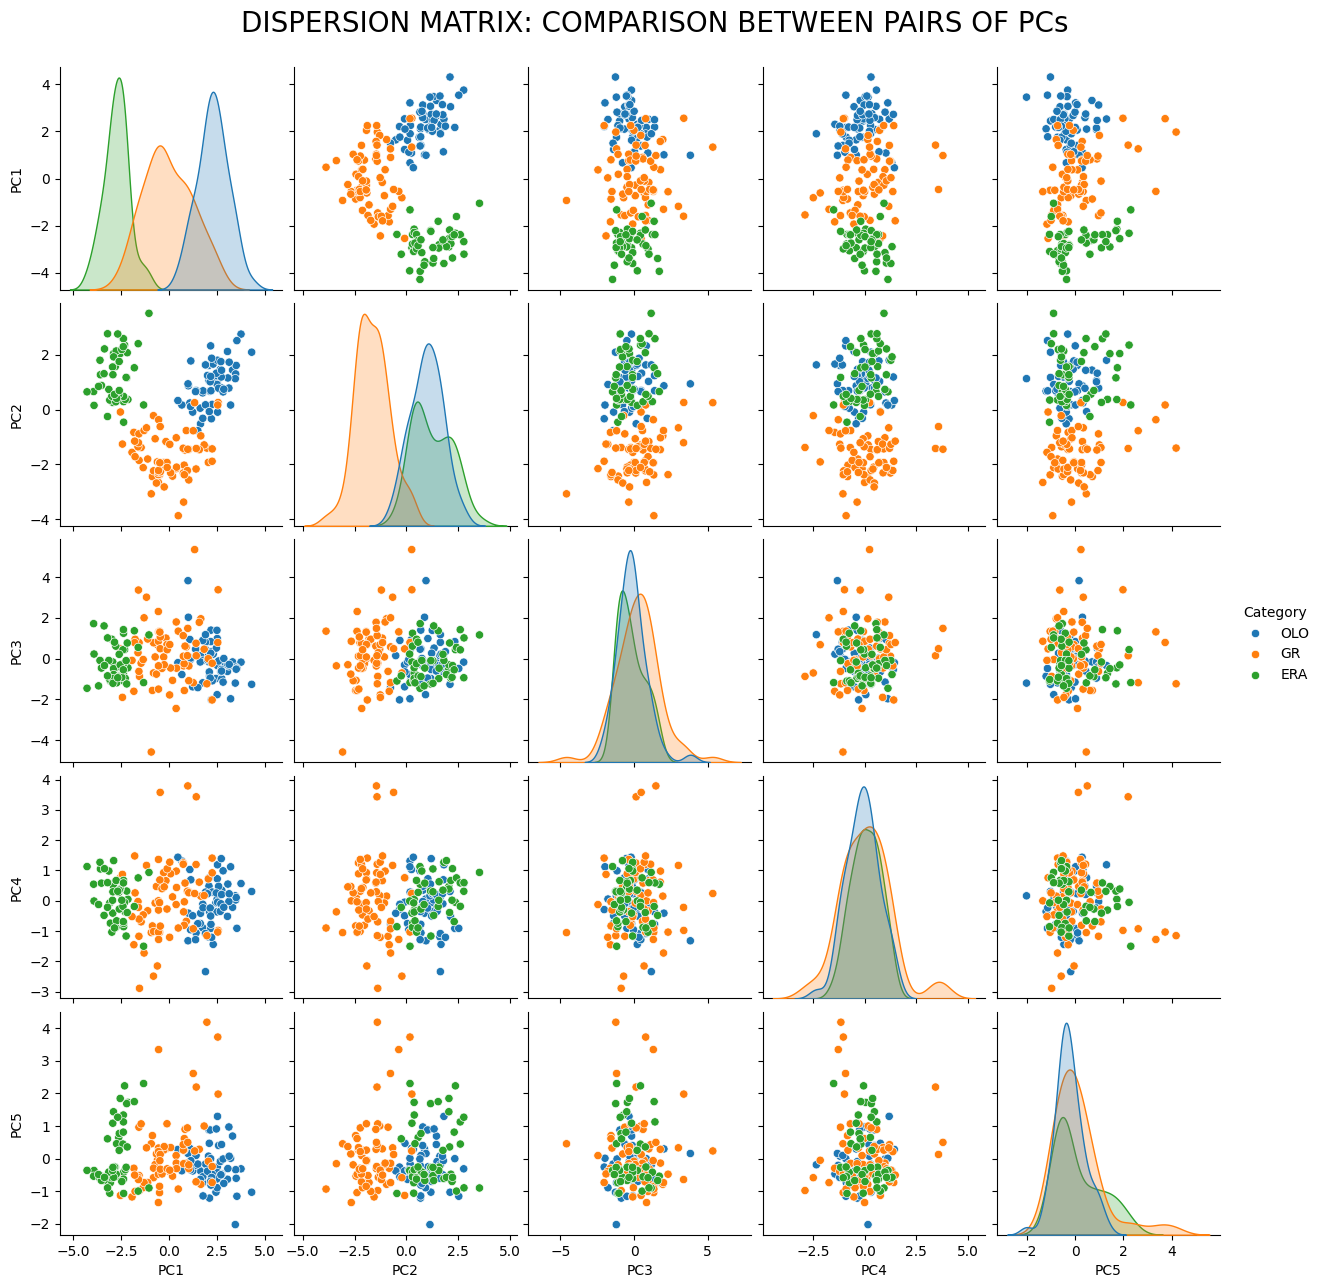

In [55]:
sns.pairplot(data=dfScore, hue='Category')

plt.suptitle('DISPERSION MATRIX: COMPARISON BETWEEN PAIRS OF PCs', y=1.03, fontsize=20)

After selecting the first five principal components, it is impossible to visualize the data directly in a 5-dimensional space. However, we can gain an approximate view using a **scatterplot matrix**, which shows all pairwise combinations of these components. This approach allows us to explore the multidimensional structure indirectly, observing the data from different perspectives as if looking from various angles.

Some patterns emerge from the matrix:  
- **To the right**: Data increasingly overlap, as higher-order components capture less variance.  
- **Downwards**: A similar trend is observed, with more overlap.  
- **Along the main diagonal**: Overall dispersion gradually decreases, while overlaps between distributions increase.  
- **Correlation**: Components remain uncorrelated, which is expected due to their orthogonality.

The clearest separation occurs between **PC1 and PC2**, where the scatterplot distinctly shows the Barbera (green), Grignolino (orange) and Barolo (blue) wines. This suggests that a clustering model applied to these two components could perform well. Conversely, **PC4 and PC5** show the poorest separation, with significant overlap and reduced variance.

Finally, examining the distributions by wine variety, Barolo exhibits a more symmetric, bell-shaped pattern across components, while Barbera and Grignolino show more irregular and less symmetric distributions, especially in higher-order components.

**BIPLOT**

The Biplot is a powerful tool in multivariate statistics that allows us to visualize both **observations** (samples) and **variables** in the same 2D or 3D space, usually derived from a Principal Component Analysis (PCA).

Each point represents a sample, while each vector (arrow) represents a variable, showing both its direction and strength of influence on the principal components. This way, we can see relationships between samples, relationships between variables and how variables contribute to separating the samples.

**How it works:**  
- Start with a data matrix $X$ containing $n$ observations and $m$ variables.  
- Apply PCA to reduce dimensionality to 2 or 3 principal components.  
- Project the samples as points in the component space.  
- Draw variables as vectors indicating their correlation with the components.

**Interpretation:**  
- Close points → similar samples  
- Arrow length → contribution of a variable to total variability  
- Angle between arrows → correlation between variables:  
  - Small angle → positive correlation  
  - Right angle → independent  
  - Near 180° → negative correlation  

**In short:** the Biplot provides a single and intuitive visualization of both the data structure and the role of each variable.

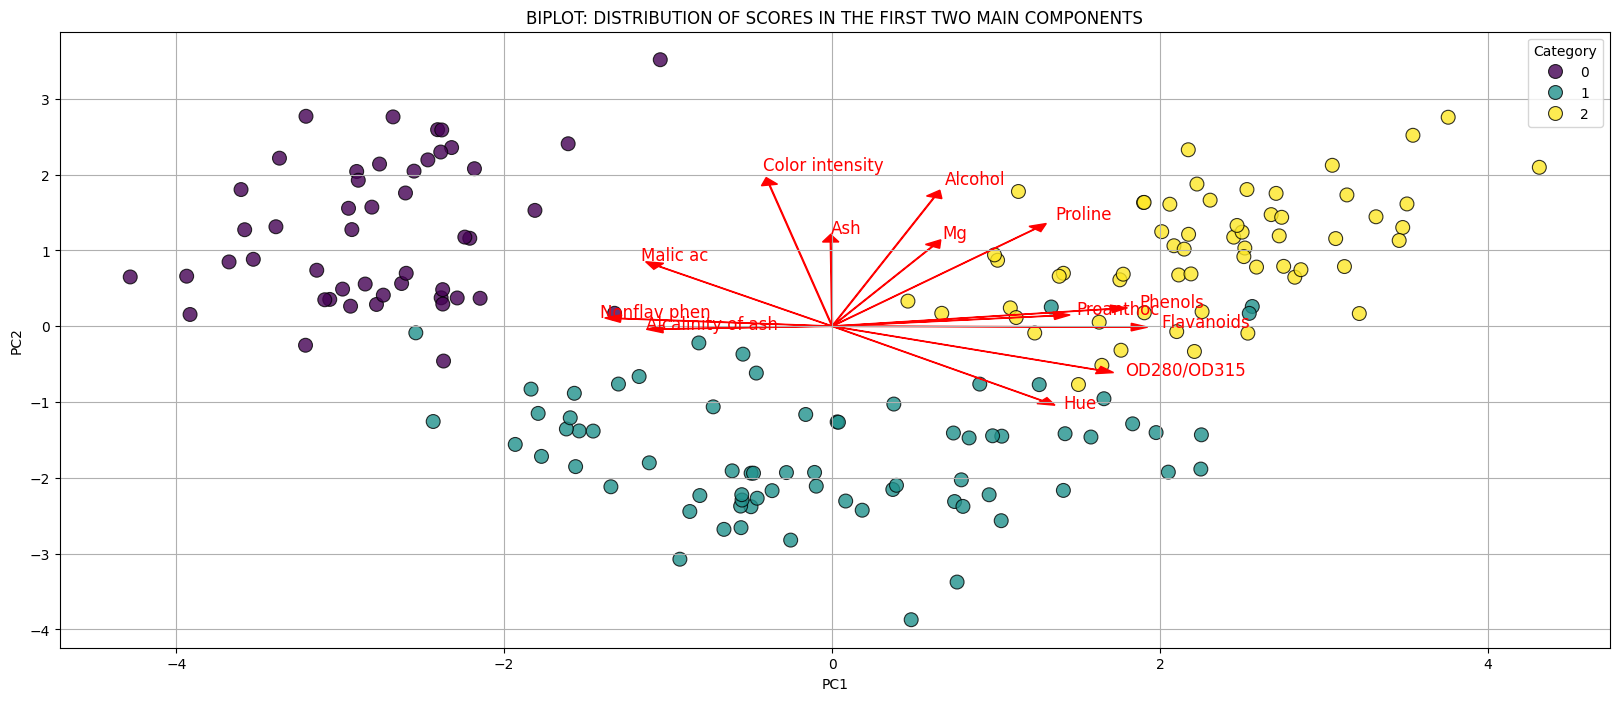

In [56]:
plt.figure(figsize=(20, 8))

# Scatter plot of the scores
sns.scatterplot(x=dfScore.iloc[:, 1], y=dfScore.iloc[:, 2], hue=pd.Categorical(df['Category']).codes, palette='viridis', s=100, edgecolor='black', alpha=0.8)

# Adding arrows for variable vectors
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, # point of application of the vectors
              dfLoadings.iloc[i, 0] * max(dfScore.iloc[:, 1]), dfLoadings.iloc[i, 1] * max(dfScore.iloc[:, 2]), # coordinates of the "tip" of the vector
              color='red', width=0.005, head_width=0.1, head_length=0.1)
    
    # Adding variable names
    plt.text(dfLoadings.iloc[i, 0] * max(dfScore.iloc[:, 1])*1.1, dfLoadings.iloc[i, 1] * max(dfScore.iloc[:, 2])*1.1,  # Coordinate di posizionamento del testo
             dfLoadings.index[i], color='red', fontsize=12)

# Setting title and axis labels
plt.title('BIPLOT: DISTRIBUTION OF SCORES IN THE FIRST TWO MAIN COMPONENTS')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Showing the legend
plt.legend(title='Category')
plt.grid(True)


Observations closer to a vector or aligned with its direction are likely to have higher values for that variable.

**Observations by wine type:**  
- **Barbera (Category 0):** mostly in the second quadrant, showing medium-high malic acid levels and intense color, while having lower hue and OD280/OD315 values. Wines with these characteristics are likely Barbera.  
- **Grignolino (Category 1):** dominates the lower part of the plot; most variables pointing upward are low in these wines. Some wines are highly saturated, but generally, low malic acid, color intensity, ash, alcohol, magnesium and proline indicate Grignolino.  
- **Barolo (Category 2):** positioned in specular manner to Barbera with respect to PC1, distinguished mainly by high alcohol and proline levels. Magnesium points in the same direction but with a smaller contribution.

**Interpretation of vectors:**  
- Quadrants help interpret **variable loadings**:  
  - 1st quadrant → positive contribution to both PCs  
  - 2nd quadrant → positive for PC2 only  
  - 3rd quadrant → negative contribution  
  - 4th quadrant → positive for PC1 only  
- Longer arrows indicate stronger influence on the corresponding principal component.  
  - PC1 is largely influenced by flavonoids, while ash has negligible effect.  
  - PC2 is mainly supported by **color intensity**, with hue contributing negatively.

**Correlation insights:**  
- Vectors close in angle and magnitude are strongly positively correlated (e.g., flavonoids and phenolic compounds).  
- Vectors forming near-180° angles are inversely correlated (e.g., malic acid vs. saturation).

In [74]:
# Figure creation
fig = go.Figure()


categorie = dfScore['Category'].unique()
for i in range (3):
    ind = dfScore[dfScore['Category']==categorie[i]].index
    fig.add_trace(go.Scatter3d(x=dfScore.iloc[ind, 3], y=dfScore.iloc[ind, 4], z=dfScore.iloc[ind, 5], mode='markers', name=categorie[i], marker=dict(symbol='circle-open', opacity=0.8)))

# Adding orignal variable vectors
for i in range(loadings.shape[0]):
    # Initial point of the vector (origin)
    x0, y0, z0 = 0, 0, 0
    # Final components of the vector
    x_end = dfLoadings.iloc[i, 2]
    y_end = dfLoadings.iloc[i, 3]
    z_end = dfLoadings.iloc[i, 4]
    
    # Adding the vector to the plot as a line trace
    fig.add_trace(go.Scatter3d(
        x=np.multiply([x0, x_end], max(dfScore.iloc[:, 3])),
        y=np.multiply([y0, y_end], max(dfScore.iloc[:, 4])),
        z=np.multiply([z0, z_end], max(dfScore.iloc[:, 5])),
        mode='lines+markers',
        name=dfNum.columns[i],
        line=dict(width=2),
        marker=dict(size=4)
    ))
    
# Layout update
fig.update_layout(height=700, scene=dict(xaxis_title="PC3", yaxis_title="PC4", zaxis_title="PC5"), title='"TRI"PLOT: DISTRIBUTION OF SCORES IN THE LAST THREE PCs')

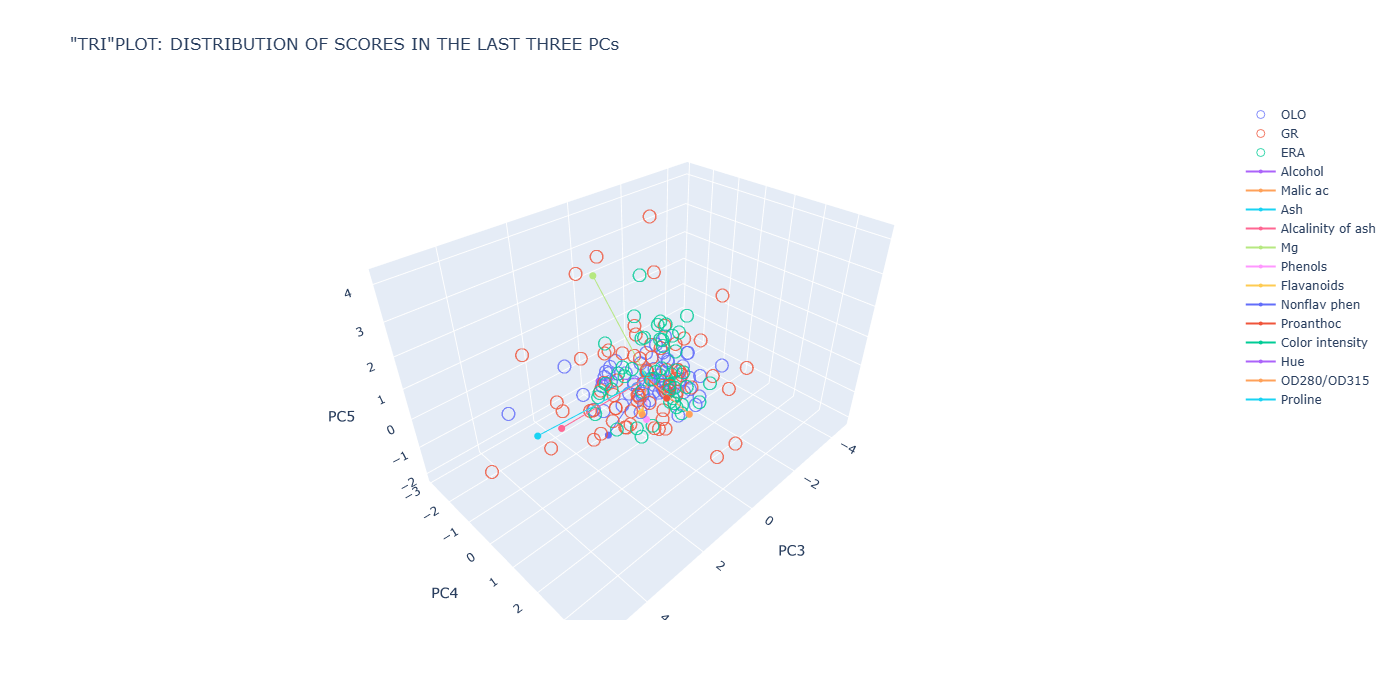

In [75]:
Image.open("distibution of scores in the last three pcs.png")

The 3D plot is more complex, and interpreting the data at first glance can be challenging. Interacting with the legend to isolate specific elements significantly improves clarity and readability.  

As with the previous parallel coordinates plot, in a 3D biplot the vectors of the original variables indicate the directions of the variables in the principal component space. When a variable vector overlaps with observations, it suggests that those observations have high values along that variable.  

To better understand the structure, I isolate the wines of each category and examine how individual variable directions align with them in 3D space. These observations generally confirm what we saw in the other plot—for instance, high alcohol content characterizes Barolo wines.  

**Principal Components Insights:**  
- **PC5:** strongest contributor → magnesium | weakest → nonflav phen  
- **PC3:** strongest → ash | weakest → alcohol  
- **PC4:** strongest → malic acid | weakest → hue  

Since this plot was mainly exploratory and driven by curiosity, I won’t dwell further on it. It still provides a useful multidimensional perspective on variable contributions across wine categories.

In [58]:
dfScore

,Category,PC1,PC2,PC3,PC4,PC5
0,OLO,3.316751,1.443463,-0.165739,-0.215631,0.693043
1,OLO,2.209465,-0.333393,-2.026457,-0.291358,-0.257655
2,OLO,2.516740,1.031151,0.982819,0.724902,-0.251033
3,OLO,3.757066,2.756372,-0.176192,0.567983,-0.311842
4,OLO,1.008908,0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...,...
173,ERA,-3.370524,2.216289,-0.342570,1.058527,-0.574164
174,ERA,-2.601956,1.757229,0.207581,0.349496,0.255063
175,ERA,-2.677839,2.760899,-0.940942,0.312035,1.271355
176,ERA,-2.387017,2.297347,-0.550696,-0.688285,0.813955


**HOTELLING'S $T^2$**

Hotelling’s $T^2$ measures how far a given observation is from the center in the principal component space. Formally, for the i-th observation

$$
T_i^2 = z_i^T \Lambda^{-1} z_i
$$

where:  
- $z_i$ is the **score vector** of the i-th observation  
- $\Lambda$ is the **diagonal matrix of principal component variances** (eigenvalues)  

**Interpretation:**  
T² helps identify observations that are “anomalous along the principal components.” In other words, it’s useful for detecting outliers in the PCA model.

In [59]:
t2 = np.sum(dfScore.drop(columns='Category')**2, axis=1)
t2

0      13.638695
1       9.250691
2       8.951687
3      22.164022
4       6.138952
         ...    
173    17.839868
174    10.088324
175    17.392469
176    12.415177
177    20.148729
Length: 178, dtype: float64

**Q-RESIDUAL (SQUARE PREDICTION ERROR, SPE)**

The **Q-residual** measures the variance **not explained by the PCA**, i.e., how much an observation differs from its PCA approximation $\hat{x}_i = z_i V^T$:

$$
Q_i = \| x_i - \hat{x}_i \|^2 = \| x_i - z_i V^T \|^2
$$

**Interpretation:**  
Q identifies outliers in the **residual space**, highlighting details not captured by the principal components. A high Q value indicates that the observation contains information **not enoughly explained by the first k principal components**.

In [60]:
q = np.sum((matriceResidui)**2, axis=1)
q

0      2.364663
1      2.203856
2      2.082937
3      1.406394
4      0.978912
         ...   
173    2.323956
174    0.559369
175    1.355760
176    2.394913
177    0.930956
Length: 178, dtype: float64

In [61]:
pd.concat([pd.DataFrame(t2, columns=['T²']), pd.DataFrame(q, columns=['Q'])], axis=1)

,T²,Q
0,13.638695,2.364663
1,9.250691,2.203856
2,8.951687,2.082937
3,22.164022,1.406394
4,6.138952,0.978912
...,...,...
173,17.839868,2.323956
174,10.088324,0.559369
175,17.392469,1.355760
176,12.415177,2.394913


As mentioned earlier, **$T^2$ and Q** are used to determine whether a sample is an outlier. One common approach is to calculate an **upper confidence interval**, which defines a threshold beyond which values can be considered anomalous.

The confidence interval is calculated as:

$$\mu \pm t \cdot SEM$$

where:

- **$\mu$**: the mean of the sample  
- **$t$**: a critical value that determines the width of the confidence interval around the sample mean. It reflects the uncertainty in estimating the population mean. This critical value is obtained from the **Student's t-distribution** (been a “safer” version of the normal distribution for very small samples, it accounts for the extra uncertainty that comes from estimating parameters with limited data, making confidence intervals and tests more reliable) using the **ppf (percent-point function)**, which is the inverse of the CDF:  
  - The **CDF (cumulative distribution function)** gives the probability that a random variable $X$ is less than or equal to a specific value $x$.  
  - The **ppf** tells us the value of $x$ corresponding to a given probability $p$, e.g., the 95th percentile of the distribution.  

For a **95% confidence level**, we have a **two-sided interval** leaving 5% in the tails:  
- Lower bound $t_{inf}$ corresponds to CDF = 0.025  
- Upper bound $t_{sup}$ corresponds to CDF = 0.975

Thanks to the symmetry of the Student's t-distribution, calculating just $t_{sup}$ is sufficient to define the interval.

- **SEM (Standard Error of the Mean)**: quantifies how close the sample mean is to the population mean. It accounts for variability across samples and is calculated as:

$$SEM = \frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the standard deviation and $n$ is the sample size. SEM is essential for defining the confidence interval and, ultimately, the threshold for identifying outliers.

In [62]:
# Confidence limit calculation function
def confidence_upper_limit(data, confidence):
    mean = np.mean(data)
    error = sem(data)  # SEM
    t_value = t.ppf((1 + confidence) / 2, len(data) - 1)  # critical t value
    return mean + error * t_value  # returns only the upper limit

# Calculate the upper confidence limit
t2_threshold = confidence_upper_limit(data=t2, confidence=0.95)
t2_threshold

np.float64(11.2157440019715)

In [63]:
q_threshold = confidence_upper_limit(data=q, confidence=0.95)
q_threshold

np.float64(2.8470877309125804)

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=q, mode='markers', name='Residuals (Q)'))
fig.add_trace(go.Scatter(x=[0, len(q)], y=[q_threshold, q_threshold], mode='lines', line=dict(dash='dash'), name='Treshold at Q=95%'))

fig.update_layout(title='RESIDUALS PLOT', xaxis_title="Index", yaxis_title="Q", template='presentation')

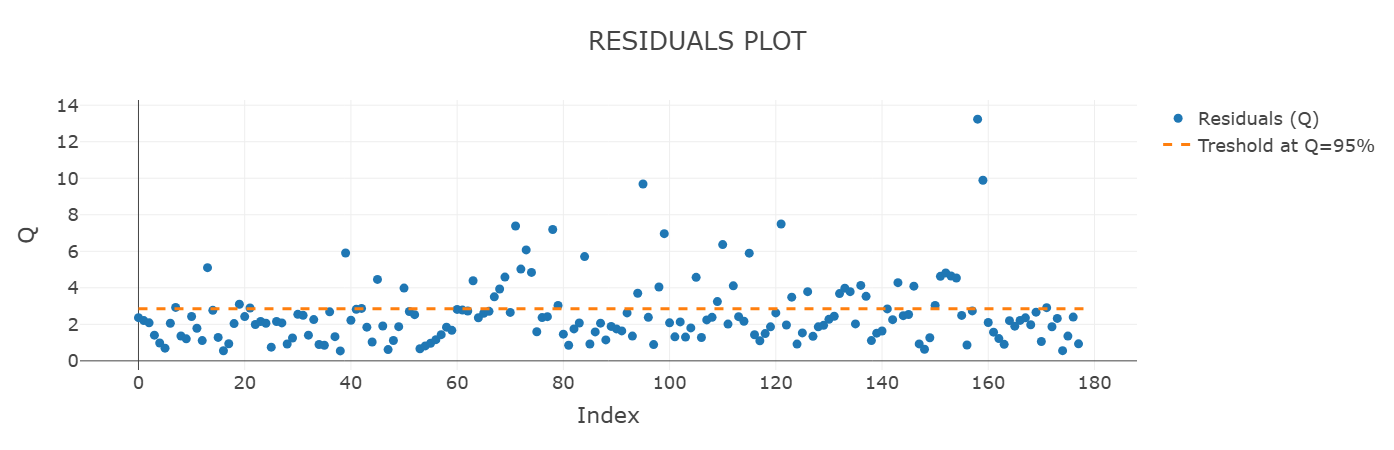

In [76]:
Image.open("residuals plot.png")

The residual matrix illustrates how accurately the PCA represents the data in the new coordinates defined by the five components. A 95% confidence threshold has been set: points above this threshold indicate larger representation errors, while those below the red line are well projected.  

Overall, the PCA shows **good accuracy**. Although some data points have higher residuals, most observations are projected correctly, with relatively few errors. This suggests that the dimensionality reduction captures the main structure of the dataset effectively.


In [65]:
fig = go.Figure()

# Scatter plot of the samples
fig.add_trace(go.Scatter(x=t2, y=q, mode='markers', name='Samples'))

# Vertical line for the T² threshold
fig.add_trace(go.Scatter(x=[t2_threshold, t2_threshold], y=[min(q), max(q)], mode='lines', line=dict(dash='dash'), name='Treshold T²'))

# Horizontal line for the Q threshold
fig.add_trace(go.Scatter(x=[min(t2), max(t2)], y=[q_threshold, q_threshold], mode='lines', line=dict(dash='dash'), name='Treshold Q'))

# Layout update
fig.update_layout(title="T² VS Q", xaxis_title="Hotelling's T²", yaxis_title="Residual Q", template='presentation')


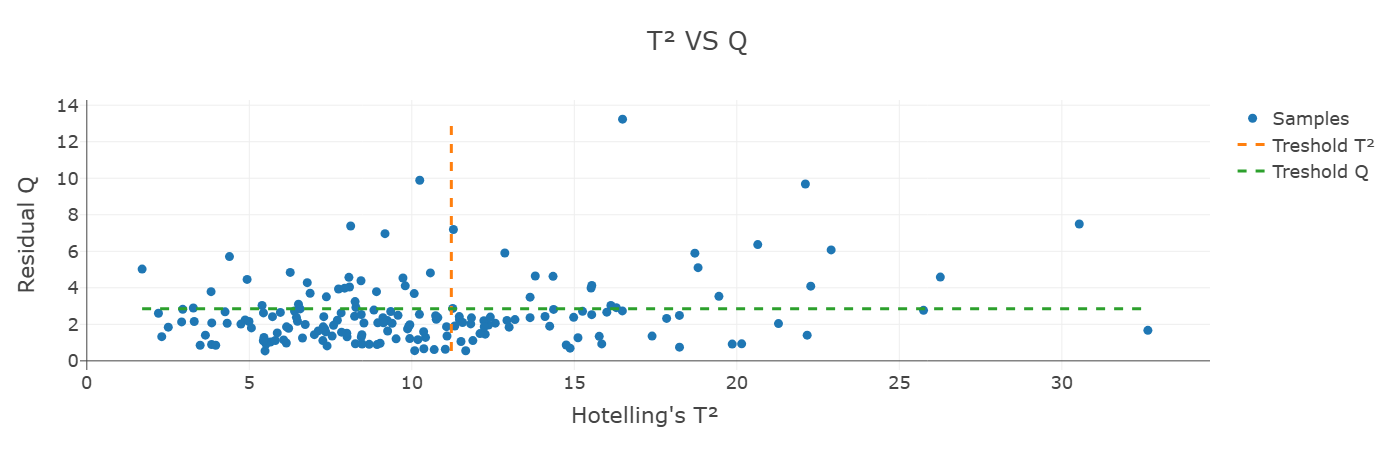

In [77]:
Image.open("t2 vs q.png")

The $T^2$ vs $Q$ plot divides the plane into four quadrants, helping classify samples based on their residuals and model representation. Each quadrant highlights whether samples are likely normal or potential outliers, considering both $T^2$ (red line) and $Q$ (green line) relative to their thresholds.  

- **Bottom-left ($T^2$ low, Q low):** Samples are well represented by the PCA model with no unusual behavior.  
- **Bottom-right ($T^2$ high, Q low):** Samples are far from the PCA center but have low reconstruction error, generally well represented despite their position.  
- **Top-left ($T^2$ low, Q high):** Samples are near the PCA center but poorly reconstructed, indicating higher reconstruction error.  
- **Top-right ($T^2$ high, Q high):** Potential extreme outliers, far from the center and poorly reconstructed.  

Most samples cluster in the bottom-left quadrant, confirming a large proportion of normal points. A few extreme outliers appear in the top-right quadrant, especially those exceeding both thresholds. Overall, the PCA model performs well in capturing the main structure of the data.